In [28]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('0427_2', usecols=['B1','B2','B4','NDVI','RSWIR','sigmaVV'])

In [30]:
df.head()

B1      B2      B4    NDVI   RSWIR  sigmaVV
0  1716.0  1530.0  1501.0  0.0248  0.2630 -15.0204
1  1716.0  1530.0  1501.0  0.0248  0.2630 -14.2883
2  1685.0  1525.0  1517.0  0.0153  0.2606 -13.6305
3  1685.0  1525.0  1517.0  0.0153  0.2606 -13.2566
4  1685.0  1525.0  1517.0  0.0153  0.2606 -12.9416

In [31]:
X = df.drop(['sigmaVV'], axis=1)
# X = df

In [32]:
y = df['sigmaVV']

In [33]:
mask = (df['sigmaVV'] <=-19).astype(int)
y=mask

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X[['B1','B2','B4']] = scaler.fit_transform(X[['B1','B2','B4']])
# X[['B1','B2','B4','sigmaVV']] = scaler.fit_transform(X[['B1','B2','B4', 'sigmaVV']])

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
tree = DecisionTreeClassifier()


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
sa = SVC()

In [41]:
ra = RandomForestClassifier()

In [42]:
X.head()

B1        B2        B4    NDVI   RSWIR
0  0.094381  0.098657  0.174357  0.0248  0.2630
1  0.094381  0.098657  0.174357  0.0248  0.2630
2  0.077469  0.096341  0.180890  0.0153  0.2606
3  0.077469  0.096341  0.180890  0.0153  0.2606
4  0.077469  0.096341  0.180890  0.0153  0.2606

In [43]:
X.shape

(4500000, 5)

In [44]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
print(len(y[y==0]))

3018145
131855
4311698


In [45]:
tree = tree.fit(X_train, y_train)

In [46]:
# sa = sa.fit(X_train, y_train)

In [47]:
y_pred = tree.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test, y_pred)

array([[1286366,    7187],
       [  10533,   45914]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9868740740740741

In [24]:
X_test.shape

(1350000, 6)

In [25]:
y_test.shape

(1350000,)

In [26]:
df_0804 = pd.read_csv('0804',usecols=['B1','B2','B4','NDVI','RSWIR', 'sigmaVV'])

In [27]:
df_0804.head()

B1      B2      B4    NDVI   RSWIR  sigmaVV
0  7373.0  8097.0  7696.0 -0.0456  0.7405  -7.7231
1  7373.0  8097.0  7696.0 -0.0456  0.7405  -7.8233
2  7373.0  8097.0  7696.0 -0.0456  0.7405  -8.2189
3  7550.0  7208.0  7243.0 -0.0117  0.7134  -8.7220
4  7550.0  7208.0  7243.0 -0.0117  0.7134  -9.1989

In [28]:
# X_0804 = df_0804.drop('sigmaVV', axis=1)
X_0804 = df_0804

In [29]:
y_0804 = df_0804['sigmaVV']

In [30]:
mask = (df_0804['sigmaVV'] <=-19).astype(int)
y_0804 = mask

In [31]:
X_0804[['B1','B2','B4', 'sigmaVV']] = scaler.fit_transform(X_0804[['B1','B2','B4', 'sigmaVV']])

In [32]:
y_pred_0804 = tree.predict(X_0804)

In [33]:
confusion_matrix(y_0804, y_pred_0804)  

array([[4114010,   15317],
       [      0,  370673]])

In [36]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_0804, y_pred_0804)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.96


Text(0.5,1,'2-class Precision-Recall curve: AP=0.96')

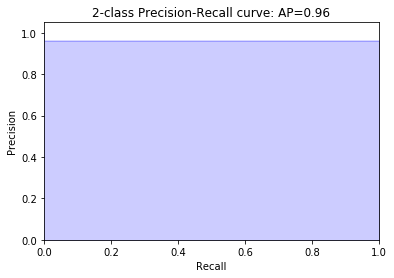

In [37]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_0804, y_pred_0804)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_0804, y_pred_0804)

0.9965962222222222

In [102]:
y_pred_0804.shape

(4500000,)

In [103]:
X.shape

(4500000, 6)

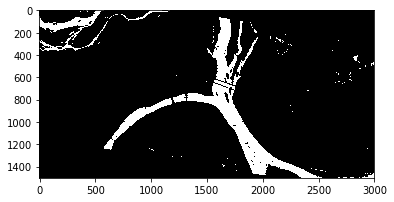

In [104]:
plt.imshow(y_pred_0804.reshape(1500,3000), cmap='gray', interpolation='nearest')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0975086 to fit



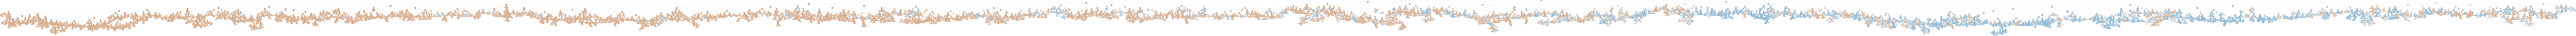

In [34]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(tree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [117]:
df = pd.read_csv('0427_2', usecols=['B1','B2','B4','NDVI','RSWIR','sigmaVV'])
mask2 = (df['sigmaVV'] <=-19).astype(int)

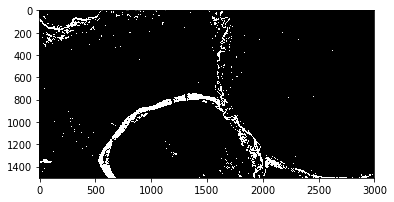

In [119]:
plt.imshow(mask2.as_matrix().reshape(1500,3000), cmap='gray', interpolation='nearest')

In [120]:
mask2_reshape = mask2.as_matrix().reshape(1500,3000)

In [121]:
df.columns

Index(['B1', 'B2', 'B4', 'NDVI', 'RSWIR', 'sigmaVV'], dtype='object')

In [122]:
y_pred_0804_reshape = y_pred_0804.reshape(1500,3000)

In [133]:
flood = y_pred_0804_reshape-mask2_reshape
flood[flood<0]=0

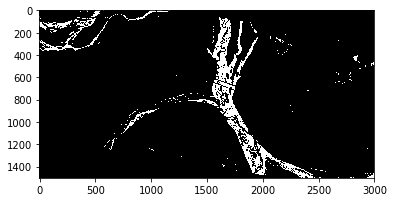

In [134]:
plt.imshow(flood, cmap='gray', interpolation='nearest')

In [141]:
np.savetxt("flood_sub.txt", flood)

In [142]:
zeros = np.empty((3336,4344))
zeros[:] = np.nan

In [143]:
zeros

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [144]:
zeros[1000:2500,1000:4000] = flood

In [145]:
zeros

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

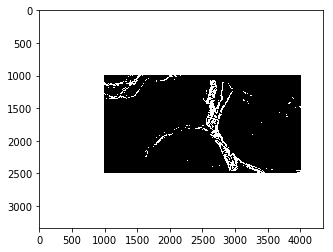

In [146]:
plt.imshow(zeros, cmap='gray', interpolation='nearest')

In [147]:
np.savetxt("flood.txt", zeros)

In [148]:
zeros[np.isnan(zeros)]=0

In [149]:
np.savetxt("flood_0.txt", zeros)